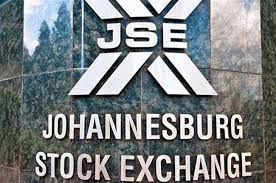

In [1]:
from PIL import Image
Image.open('jse1.jpg')

# Brief Description

Cluster analysis is an important concept as it helps businesses understand the natural grouping of certain variables in a dataset. Especially for investors, in the case of this project, who want to understand the best portfolios when investing in the stock market.

The purpose of this project was to conduct Kmeans clustering to identify the different clusters of the top thirty companies on the Johannesburg Stock Exchange (JSE). 

The companies are from different industries including agriculture, mining, retail, telecommunications, information technology, finance and investment.

The variables I used were the daily stock returns and the standard deviation of those stocks to input into the Kmeans algorithm. I also plotted a Dendrogram to visualise the hierarchical clustering as well.



### List of companies and briefly what they are about

1 - British American Tobacco - is the holding company for a group of companies that manufacture, market and sell cigarettes and other tobacco products, including cigars and roll-your-own tobacco. It is the world’s second-largest tobacco company by sales (after Philip Morris International).


2 - Richemont - is a Switzerland-based luxury goods holding company founded in 1988 by South African businessman Johann Rupert.


3 - Anglo America - is a global mining company. The Company’s mining portfolio includes bulk commodities including iron ore, manganese and metallurgical coal, base metals including copper and nickel and precious metals and minerals including platinum and diamonds. 


4 - MTN - is a multinational telecommunications group, operating in countries in Africa and the Middle East.


5 - Naspers -  is a holding company for a group of companies which operate in the electronic and print media industries. The Group provides television subscription and internet services and publishes newspapers, magazines and books.


6 - Sasol - is an integrated oil and gas company with substantial chemical interests, with production facilities located in South Africa, Europe, North America and Asia. The Company operates commercial scale facilities to produce fuels and chemicals from coal in South Africa, and is developing ventures internationally to convert natural gas into clean diesel fuel. 


7 - Standard Bank - is the holding company for a group of companies offering financial services. The Group provides services in personal, corporate, merchant and commercial banking, including insurance broking, mutual fund management, property fund management, as well as other services. 


8 - Vodacom - is a cellular telephone network in South Africa. The Company has mobile operations in Tanzania, Mozambique, Lesotho and the Democratic Republic of Congo.


9 - Kumba - mines for and produces iron ore.


10 - First Rand - is a financial services group providing banking and insurance products and services to retail, commercial, corporate and public sector customers through its portfolio of separately branded franchises. 


11 - ABSA - is the holding company of a banking and financial services group. The Group provides a range of retail and corporate banking, insurance, financial and property services through local and international networks.


12 - Sanlam - is a financial services group in South Africa. Through its subsidiaries, Sanlam is a provider of life insurance, retirement annuities, unit trusts, health insurance, and employee benefits. In addition, the Group provides investment and risk products to group funds.


13 - Shoprite - is an investment holding company with subsidiaries operating in the supermarket, produce distribution, furniture retailing, and property holding industries. Retail chains of the Group include “Shoprite”, “Checkers”, “OK”, “Hyperama”, “Freshmark”, and Sentra”.


14 - Remgro - is an investment holding company that invests in banking and financial services, packaging, glass products, medical services, mining, petroleum, wine and spirits, food and home and personal care products.


15 - Nedbank - is a bank holding company which provides personal, commercial, corporate and merchant banking, fund management and related financial services throughout South Africa. In addition, Nedbank operates internationally through offices in London, Isle of Man, and subsidiaries and associates in sub-Saharan.


16 - Aspen - is a global supplier of branded and generic pharmaceuticals and of consumer and nutritional products in selected territories.


17 - Bidvest -  is a leading South African services, trading and distribution group.


18 - Woolworths -  is a South African-based retail group. The Group, operates a chain of retail stores offering a selected range of clothing, food, homeware, beauty and financial services under its own brand name. The Company also owns a clothing and homeware retailer and has stores in selected African countries and the Middle East.


19 - Tiger Brands - manufactures, processes and distributes food products which include milling and baking, confectioneries, general foods, edible oils and derivatives. The Group also owns a South African pharmaceutical manufacturer and distributor.


20 - Mediclinic -  is an international private hospital group with operations in South Africa, Namibia, Switzerland and the United Arab Emirates.


21 - Exxaro - mines and produces coal.


22 - Rand Merchant - is an investment holding company. Through its equity investment in FirstRand Limited, the Company has activities which include life, group, pension and annuity assurance, merchant banking, asset and fund management, property management and other services. RMB Holdings holds investments in insurance and financial services companies.


23 - Growthpoint - is a real estate company in South Africa. The Company owns a portfolio of commercial, retail and industrial (mostly warehouses) properties in South Africa and Australia.


24 - Mondi - is an integrated paper and packaging group. The Company manufactures packaging paper, converted packaging products and office paper. Mondi has operations and interests in Western Europe, Emerging Europe And South Africa.


25 - Steinhoff - is the holding company for a group of companies that manufacture and distribute household goods and related timber products throughout southern Africa and Europe.


26 - Investec - is an international specialist bank and asset manager. The Group provides corporate and investment banking, private banking, securities trading, asset management, property trading and management and trade finance services.


27 - Massmart - distributes and retails general merchandise, food, and liquors to customers in southern Africa. The Group operates through five separate chains: Game, Dion, Makro, Shield, and CCW.


28 - Truworths - distributes and retails general merchandise, food, and liquors to customers in southern Africa. The Group operates through five separate chains: Game, Dion, Makro, Shield, and CCW.


29 - African Ranbow Minerals - is a diversified South African mining company with long-life, low unit cost assets. The Company mines and beneficiates iron ore, manganese ore and alloys, platinum group metals, copper, nickel and coal.


30 - African Ranbow Capital Investments - focuses on opportunities in the South African and African financial services and diversified investments (non-financial) industries.

In [30]:
#importing the relevant libraries
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# Importing data and cleaning

In [3]:
#Creating list of the tickers
tickers = ['BTI.JO','CFR.JO','AGL.JO','MTN.JO',
           'NPN.JO','SOL.JO','SBK.JO','VOD.JO',
           'KIO.JO','FSR.JO','MEI.JO','ABSP.JO',
           'SLM.JO','SHP.JO','REM.JO','NED.JO',
           'APN.JO','BVT.JO','WHL.JO','TBS.JO',
           'EXX.JO', 'RMI.JO', 'GRT.JO', 'MNP.JO',
           'SNH.JO', 'INP.JO','MSM.JO','TRU.JO',
           'ARI.JO', 'AIL.JO']

#Creating empty data frame that will be populated by the finance data that will be pulled from yahoo finance
finance_data = pd.DataFrame()
finance_data[tickers] = wb.DataReader(tickers, 
                                     data_source ='yahoo', 
                                     start = '2021-5-10', 
                                     end ='2022-5-10')['Adj Close']# will be using the Adjusted Close Prices

In [4]:
finance_data.head()

,BTI.JO,CFR.JO,AGL.JO,MTN.JO,NPN.JO,SOL.JO,SBK.JO,VOD.JO,KIO.JO,FSR.JO,...,EXX.JO,RMI.JO,GRT.JO,MNP.JO,SNH.JO,INP.JO,MSM.JO,TRU.JO,ARI.JO,AIL.JO
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-10,51641.160156,14564.963867,66179.250000,9421.212891,322491.65625,24050.0,11507.860352,11447.778320,60948.042969,5129.710938,...,13714.037109,3022.878906,1348.411133,37309.429688,200.0,5280.824219,5331.0,4681.779785,25100.023438,419.0
2021-05-11,50624.007812,14205.372070,65294.562500,9381.833984,316604.56250,23700.0,11429.201172,11401.416016,59721.808594,5145.953613,...,13373.605469,3030.412842,1330.982666,35892.429688,194.0,5120.883301,5750.0,4648.444336,24556.119141,415.0
2021-05-12,51783.816406,14160.299805,66542.546875,9650.589844,311547.21875,23951.0,11419.725586,11371.417969,61515.707031,5144.998047,...,13560.508789,3015.345459,1316.306152,36457.492188,193.0,5143.863770,5538.0,4628.998535,25112.128906,415.0
2021-05-13,51659.687500,14079.955078,63784.421875,9455.667969,301242.03125,23694.0,11367.602539,11278.693359,58853.156250,5048.499512,...,13216.740234,2980.502441,1304.381348,36576.296875,194.0,5072.165527,5622.0,4630.850586,23807.277344,418.0
2021-05-14,52208.097656,14422.890625,63521.273438,9455.667969,300826.12500,23700.0,11567.565430,11444.142578,58815.425781,5090.538574,...,13497.929688,3041.713379,1324.561646,37164.539062,203.0,5242.218262,6008.0,4772.525879,24097.820312,415.0


In [5]:
#Renaming columns of the tickers to the full company names
finance_data.rename(columns = {'BTI.JO': 'British American Tobacco', 'CFR.JO':'Richemont','AGL.JO':'Anglo America','MTN.JO':'MTN', 
                               'NPN.JO': 'Naspers', 'SOL.JO':'Sasol','SBK.JO':'Standard Bank', 'VOD.JO':'Vodacom',
                               'KIO.JO':'Kumba','FSR.JO':'First Rand', 'MEI.JO':'Mediclinic', 'ABSP.JO':'ABSA', 
                               'SLM.JO':'Sanlam','SHP.JO':'Shoprite', 'REM.JO':'Remgro','NED.JO':'Nedbank',
                               'APN.JO':'Aspen','BVT.JO':'Bidvest','WHL.JO':'Woolworths','TBS.JO':'Tiger Brands',
                               'EXX.JO': 'Exxaro', 'RMI.JO':'Rand Merchant', 'GRT.JO':'GrowthPoint Properties', 'MNP.JO':'Mondi',
                               'SNH.JO': 'Steinhoff', 'INP.JO':'Investec', 'MSM.JO':'Massmart','TRU.JO':'Truworths',
                               'ARI.JO':'African Rainbow Minerals', 'AIL.JO': 'African Rainbow Capital Investments'
                              }, 
                    inplace=True)

In [6]:
print(finance_data.head())
print(finance_data.tail())

            British American Tobacco     Richemont  Anglo America  \
Date                                                                
2021-05-10              51641.160156  14564.963867   66179.250000   
2021-05-11              50624.007812  14205.372070   65294.562500   
2021-05-12              51783.816406  14160.299805   66542.546875   
2021-05-13              51659.687500  14079.955078   63784.421875   
2021-05-14              52208.097656  14422.890625   63521.273438   

                    MTN       Naspers    Sasol  Standard Bank       Vodacom  \
Date                                                                          
2021-05-10  9421.212891  322491.65625  24050.0   11507.860352  11447.778320   
2021-05-11  9381.833984  316604.56250  23700.0   11429.201172  11401.416016   
2021-05-12  9650.589844  311547.21875  23951.0   11419.725586  11371.417969   
2021-05-13  9455.667969  301242.03125  23694.0   11367.602539  11278.693359   
2021-05-14  9455.667969  300826.12500  237

In [7]:
#checking if there are any missing values
finance_data.isnull().sum() #no null values in the data set

British American Tobacco               0
Richemont                              0
Anglo America                          0
MTN                                    0
Naspers                                0
Sasol                                  0
Standard Bank                          0
Vodacom                                0
Kumba                                  0
First Rand                             0
Mediclinic                             0
ABSA                                   0
Sanlam                                 0
Shoprite                               0
Remgro                                 0
Nedbank                                0
Aspen                                  0
Bidvest                                0
Woolworths                             0
Tiger Brands                           0
Exxaro                                 0
Rand Merchant                          0
GrowthPoint Properties                 0
Mondi                                  0
Steinhoff       

In [8]:
#checking on data types
finance_data.dtypes

British American Tobacco               float64
Richemont                              float64
Anglo America                          float64
MTN                                    float64
Naspers                                float64
Sasol                                  float64
Standard Bank                          float64
Vodacom                                float64
Kumba                                  float64
First Rand                             float64
Mediclinic                             float64
ABSA                                   float64
Sanlam                                 float64
Shoprite                               float64
Remgro                                 float64
Nedbank                                float64
Aspen                                  float64
Bidvest                                float64
Woolworths                             float64
Tiger Brands                           float64
Exxaro                                 float64
Rand Merchant

In [9]:
#Calculation of stock returns annual mean and the standard deviation
#The  will calculate how much variation is precent in the daily stock prices
daily_returns =  np.log(1 + finance_data.pct_change()).dropna()
daily_returns_annual_mean = np.log(1 + finance_data.pct_change().mean())
daily_returns_annual_var =  np.log(1 + finance_data.pct_change().std())

In [10]:
daily_returns.head()

,British American Tobacco,Richemont,Anglo America,MTN,Naspers,Sasol,Standard Bank,Vodacom,Kumba,First Rand,...,Exxaro,Rand Merchant,GrowthPoint Properties,Mondi,Steinhoff,Investec,Massmart,Truworths,African Rainbow Minerals,African Rainbow Capital Investments
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-11,-0.019893,-0.024999,-0.013458,-0.004189,-0.018424,-0.014660,-0.006859,-0.004058,-0.020324,0.003161,...,-0.025137,0.002489,-0.013009,-0.038720,-0.030459,-0.030755,0.075661,-0.007146,-0.021908,-0.009592
2021-05-12,0.022652,-0.003178,0.018933,0.028244,-0.016103,0.010535,-0.000829,-0.002635,0.029595,-0.000186,...,0.013879,-0.004984,-0.011088,0.015621,-0.005168,0.004478,-0.037566,-0.004192,0.022390,0.000000
2021-05-13,-0.002400,-0.005690,-0.042333,-0.020405,-0.033637,-0.010788,-0.004575,-0.008188,-0.044247,-0.018934,...,-0.025678,-0.011623,-0.009101,0.003253,0.005168,-0.014037,0.015054,0.000400,-0.053360,0.007203
2021-05-14,0.010560,0.024064,-0.004134,0.000000,-0.001382,0.000253,0.017438,0.014563,-0.000641,0.008293,...,0.021052,0.020329,0.015353,0.015955,0.045348,0.032977,0.066404,0.030135,0.012130,-0.007203
2021-05-17,-0.003751,0.003323,0.016055,0.004881,0.016479,-0.010605,-0.007483,0.008464,0.003740,-0.018756,...,0.001236,-0.009331,-0.020994,0.003218,-0.040206,0.003675,0.029843,-0.006619,0.001148,0.011976


In [11]:
daily_returns_annual_mean

British American Tobacco               0.001078
Richemont                              0.000810
Anglo America                          0.000270
MTN                                    0.002594
Naspers                               -0.002642
Sasol                                  0.002108
Standard Bank                          0.001487
Vodacom                                0.000944
Kumba                                 -0.000569
First Rand                             0.001128
Mediclinic                             0.000779
ABSA                                   0.001769
Sanlam                                 0.000496
Shoprite                               0.001831
Remgro                                 0.001076
Nedbank                                0.001755
Aspen                                  0.000132
Bidvest                                0.000961
Woolworths                             0.000609
Tiger Brands                          -0.000949
Exxaro                                 0

In [12]:
daily_returns_annual_var

British American Tobacco               0.013018
Richemont                              0.022701
Anglo America                          0.024315
MTN                                    0.023974
Naspers                                0.032734
Sasol                                  0.029657
Standard Bank                          0.016756
Vodacom                                0.013127
Kumba                                  0.031527
First Rand                             0.016866
Mediclinic                             0.015916
ABSA                                   0.013369
Sanlam                                 0.015921
Shoprite                               0.014881
Remgro                                 0.015555
Nedbank                                0.018806
Aspen                                  0.023186
Bidvest                                0.016465
Woolworths                             0.019021
Tiger Brands                           0.017023
Exxaro                                 0

In [13]:
#Merging the annual returns and std into a single dataframe
df_returns_std = pd.concat([daily_returns_annual_mean, daily_returns_annual_var], 
                           axis=1).\
                 rename(columns={0:'Annual Returns', 1:'Standard Deviation'})
df_returns_std

,Annual Returns,Standard Deviation
British American Tobacco,0.001078,0.013018
Richemont,0.000810,0.022701
Anglo America,0.000270,0.024315
MTN,0.002594,0.023974
Naspers,-0.002642,0.032734
Sasol,0.002108,0.029657
Standard Bank,0.001487,0.016756
Vodacom,0.000944,0.013127
Kumba,-0.000569,0.031527
First Rand,0.001128,0.016866


# Data Visualisation

### Time series of daily stock prices and the daily returns

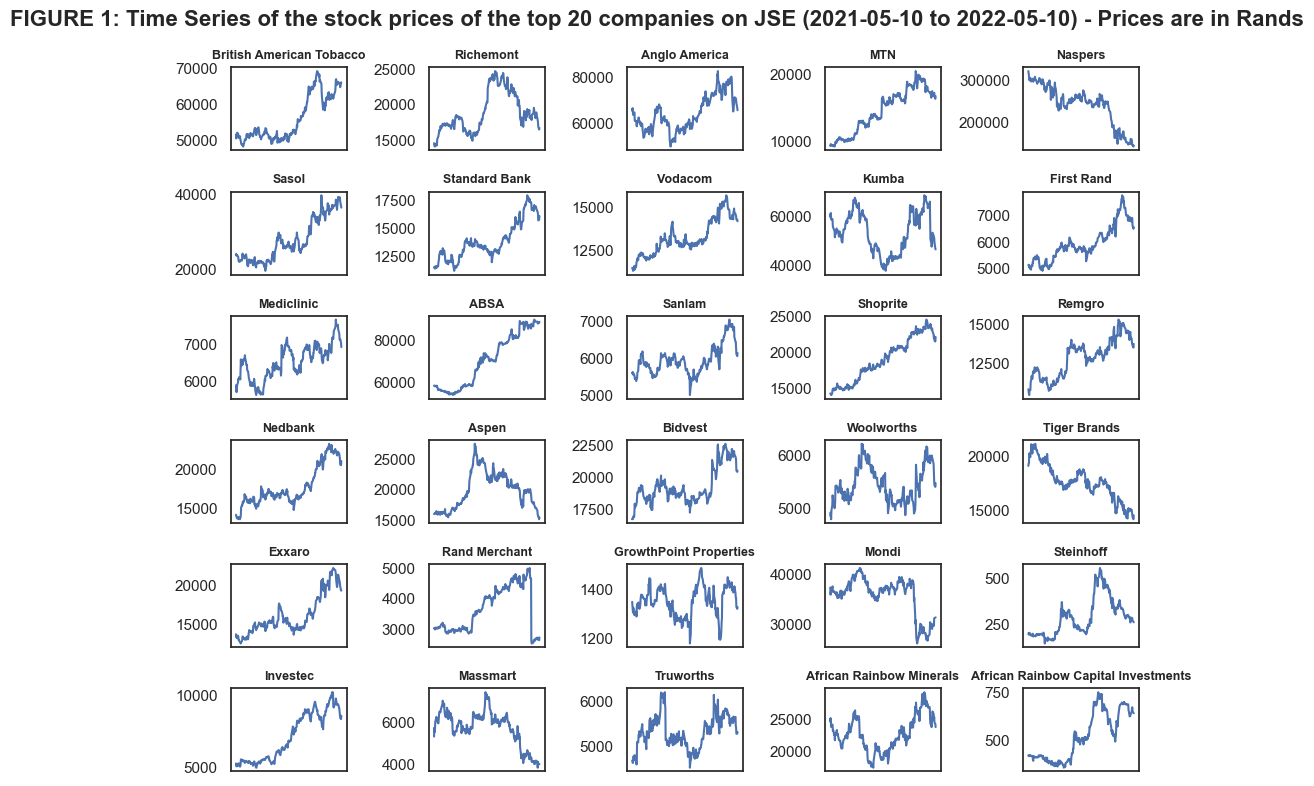

In [14]:
#plotting the daily stock prices
fig, ax = plt.subplots(6,5, sharex = True)

ax[0,0].plot(finance_data.index, 'British American Tobacco', data = finance_data)
ax[0,0].set_title('British American Tobacco', fontsize = 9, fontweight = 'bold')
ax[0,0].set_xticks([])

ax[0,1].plot(finance_data.index, 'Richemont', data = finance_data)
ax[0,1].set_title('Richemont', fontsize = 9, fontweight = 'bold')
ax[0,1].set_xticks([])

ax[0,2].plot(finance_data.index, 'Anglo America', data = finance_data)
ax[0,2].set_title('Anglo America', fontsize = 9, fontweight = 'bold')
ax[0,2].set_xticks([])

ax[0,3].plot(finance_data.index, 'MTN', data = finance_data)
ax[0,3].set_title('MTN', fontsize = 9, fontweight = 'bold')
ax[0,3].set_xticks([])

ax[0,4].plot(finance_data.index, 'Naspers', data = finance_data)
ax[0,4].set_title('Naspers', fontsize = 9, fontweight = 'bold')
ax[0,4].set_xticks([])

ax[1,0].plot(finance_data.index, 'Sasol', data = finance_data)
ax[1,0].set_title('Sasol', fontsize = 9, fontweight = 'bold')
ax[1,0].set_xticks([])

ax[1,1].plot(finance_data.index, 'Standard Bank', data = finance_data)
ax[1,1].set_title('Standard Bank', fontsize = 9, fontweight = 'bold')
ax[1,1].set_xticks([])

ax[1,2].plot(finance_data.index, 'Vodacom', data = finance_data)
ax[1,2].set_title('Vodacom', fontsize = 9, fontweight = 'bold')
ax[1,2].set_xticks([])

ax[1,3].plot(finance_data.index, 'Kumba', data = finance_data)
ax[1,3].set_title('Kumba', fontsize = 9, fontweight = 'bold')
ax[1,3].set_xticks([])

ax[1,4].plot(finance_data.index, 'First Rand', data = finance_data)
ax[1,4].set_title('First Rand', fontsize = 9, fontweight = 'bold')
ax[1,4].set_xticks([])

ax[2,0].plot(finance_data.index, 'Mediclinic', data = finance_data)
ax[2,0].set_title('Mediclinic', fontsize = 9, fontweight = 'bold')
ax[2,0].set_xticks([])

ax[2,1].plot(finance_data.index, 'ABSA', data = finance_data)
ax[2,1].set_title('ABSA', fontsize = 9, fontweight = 'bold')
ax[2,1].set_xticks([])

ax[2,2].plot(finance_data.index, 'Sanlam', data = finance_data)
ax[2,2].set_title('Sanlam', fontsize = 9, fontweight = 'bold')
ax[2,2].set_xticks([])

ax[2,3].plot(finance_data.index, 'Shoprite', data = finance_data)
ax[2,3].set_title('Shoprite', fontsize = 9, fontweight = 'bold')
ax[2,3].set_xticks([])

ax[2,4].plot(finance_data.index, 'Remgro', data = finance_data)
ax[2,4].set_title('Remgro', fontsize = 9, fontweight = 'bold')
ax[2,4].set_xticks([])

ax[3,0].plot(finance_data.index, 'Nedbank', data = finance_data)
ax[3,0].set_title('Nedbank', fontsize = 9, fontweight = 'bold')
ax[3,0].set_xticks([])

ax[3,1].plot(finance_data.index, 'Aspen', data = finance_data)
ax[3,1].set_title('Aspen', fontsize = 9, fontweight = 'bold')
ax[3,1].set_xticks([])

ax[3,2].plot(finance_data.index, 'Bidvest', data = finance_data)
ax[3,2].set_title('Bidvest', fontsize = 9, fontweight = 'bold')
ax[3,2].set_xticks([])

ax[3,3].plot(finance_data.index, 'Woolworths', data = finance_data)
ax[3,3].set_title('Woolworths', fontsize = 9, fontweight = 'bold')
ax[3,3].set_xticks([])

ax[3,4].plot(finance_data.index, 'Tiger Brands', data = finance_data)
ax[3,4].set_title('Tiger Brands', fontsize = 9, fontweight = 'bold')
ax[3,4].set_xticks([])

ax[4,0].plot(finance_data.index, 'Exxaro', data = finance_data)
ax[4,0].set_title('Exxaro', fontsize = 9, fontweight = 'bold')
ax[4,0].set_xticks([])

ax[4,1].plot(finance_data.index, 'Rand Merchant', data = finance_data)
ax[4,1].set_title('Rand Merchant', fontsize = 9, fontweight = 'bold')
ax[4,1].set_xticks([])

ax[4,2].plot(finance_data.index, 'GrowthPoint Properties', data = finance_data)
ax[4,2].set_title('GrowthPoint Properties', fontsize = 9, fontweight = 'bold')
ax[4,2].set_xticks([])

ax[4,3].plot(finance_data.index, 'Mondi', data = finance_data)
ax[4,3].set_title('Mondi', fontsize = 9, fontweight = 'bold')
ax[4,3].set_xticks([])

ax[4,4].plot(finance_data.index, 'Steinhoff', data = finance_data)
ax[4,4].set_title('Steinhoff', fontsize = 9, fontweight = 'bold')
ax[4,4].set_xticks([])

ax[5,0].plot(finance_data.index, 'Investec', data = finance_data)
ax[5,0].set_title('Investec', fontsize = 9, fontweight = 'bold')
ax[5,0].set_xticks([])

ax[5,1].plot(finance_data.index, 'Massmart', data = finance_data)
ax[5,1].set_title('Massmart', fontsize = 9, fontweight = 'bold')
ax[5,1].set_xticks([])

ax[5,2].plot(finance_data.index, 'Truworths', data = finance_data)
ax[5,2].set_title('Truworths', fontsize = 9, fontweight = 'bold')
ax[5,2].set_xticks([])

ax[5,3].plot(finance_data.index, 'African Rainbow Minerals', data = finance_data)
ax[5,3].set_title('African Rainbow Minerals', fontsize = 9, fontweight = 'bold')
ax[5,3].set_xticks([])

ax[5,4].plot(finance_data.index, 'African Rainbow Capital Investments', data = finance_data)
ax[5,4].set_title('African Rainbow Capital Investments', fontsize = 9, fontweight = 'bold')
ax[5,4].set_xticks([])


plt.suptitle('FIGURE 1: Time Series of the stock prices of the top 20 companies on JSE (2021-05-10 to 2022-05-10) - Prices are in Rands', 
             fontsize = 16, 
             fontweight = 'bold')

plt.tight_layout()

plt.show()


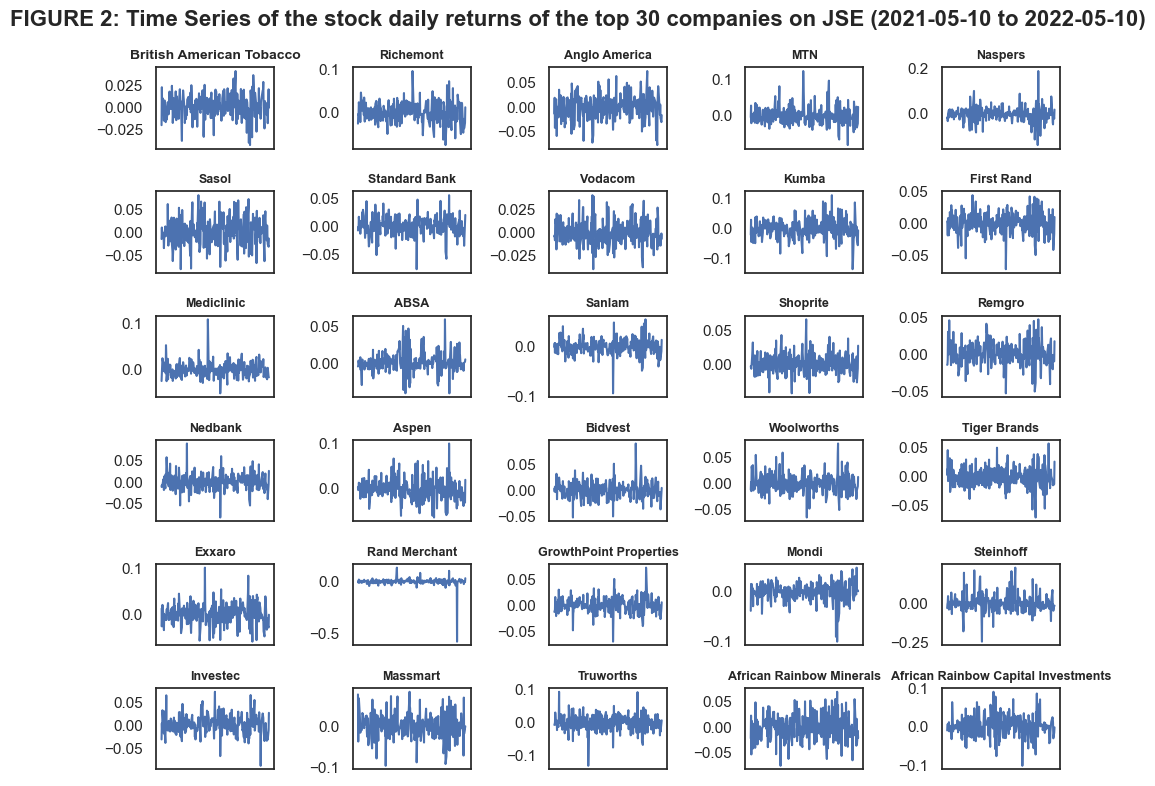

In [15]:
#Plotting the daily stock returns
fig, ax = plt.subplots(6,5, sharex = True)

ax[0,0].plot(daily_returns.index, 'British American Tobacco', data = daily_returns)
ax[0,0].set_title('British American Tobacco', fontsize = 10, fontweight = 'bold')
ax[0,0].set_xticks([])

ax[0,1].plot(daily_returns.index, 'Richemont', data = daily_returns)
ax[0,1].set_title('Richemont', fontsize = 9, fontweight = 'bold')
ax[0,1].set_xticks([])

ax[0,2].plot(daily_returns.index, 'Anglo America', data = daily_returns)
ax[0,2].set_title('Anglo America', fontsize = 9, fontweight = 'bold')
ax[0,2].set_xticks([])

ax[0,3].plot(daily_returns.index, 'MTN', data = daily_returns)
ax[0,3].set_title('MTN', fontsize = 9, fontweight = 'bold')
ax[0,3].set_xticks([])

ax[0,4].plot(daily_returns.index, 'Naspers', data = daily_returns)
ax[0,4].set_title('Naspers', fontsize = 9, fontweight = 'bold')
ax[0,4].set_xticks([])

ax[1,0].plot(daily_returns.index, 'Sasol', data = daily_returns)
ax[1,0].set_title('Sasol', fontsize = 9, fontweight = 'bold')
ax[1,0].set_xticks([])

ax[1,1].plot(daily_returns.index, 'Standard Bank', data = daily_returns)
ax[1,1].set_title('Standard Bank', fontsize = 9, fontweight = 'bold')
ax[1,1].set_xticks([])

ax[1,2].plot(daily_returns.index, 'Vodacom', data = daily_returns)
ax[1,2].set_title('Vodacom', fontsize = 9, fontweight = 'bold')
ax[1,2].set_xticks([])

ax[1,3].plot(daily_returns.index, 'Kumba', data = daily_returns)
ax[1,3].set_title('Kumba', fontsize = 9, fontweight = 'bold')
ax[1,3].set_xticks([])

ax[1,4].plot(daily_returns.index, 'First Rand', data = daily_returns)
ax[1,4].set_title('First Rand', fontsize = 9, fontweight = 'bold')
ax[1,4].set_xticks([])

ax[2,0].plot(daily_returns.index, 'Mediclinic', data = daily_returns)
ax[2,0].set_title('Mediclinic', fontsize = 9, fontweight = 'bold')
ax[2,0].set_xticks([])

ax[2,1].plot(daily_returns.index, 'ABSA', data = daily_returns)
ax[2,1].set_title('ABSA', fontsize = 9, fontweight = 'bold')
ax[2,1].set_xticks([])

ax[2,2].plot(daily_returns.index, 'Sanlam', data = daily_returns)
ax[2,2].set_title('Sanlam', fontsize = 9, fontweight = 'bold')
ax[2,2].set_xticks([])

ax[2,3].plot(daily_returns.index, 'Shoprite', data = daily_returns)
ax[2,3].set_title('Shoprite', fontsize = 9, fontweight = 'bold')
ax[2,3].set_xticks([])


ax[2,4].plot(daily_returns.index, 'Remgro', data = daily_returns)
ax[2,4].set_title('Remgro', fontsize = 9, fontweight = 'bold')
ax[2,4].set_xticks([])

ax[3,0].plot(daily_returns.index, 'Nedbank', data = daily_returns)
ax[3,0].set_title('Nedbank', fontsize = 9, fontweight = 'bold')
ax[3,0].set_xticks([])

ax[3,1].plot(daily_returns.index, 'Aspen', data = daily_returns)
ax[3,1].set_title('Aspen', fontsize = 9, fontweight = 'bold')
ax[3,1].set_xticks([])

ax[3,2].plot(daily_returns.index, 'Bidvest', data = daily_returns)
ax[3,2].set_title('Bidvest', fontsize = 9, fontweight = 'bold')
ax[3,2].set_xticks([])

ax[3,3].plot(daily_returns.index, 'Woolworths', data = daily_returns)
ax[3,3].set_title('Woolworths', fontsize = 9, fontweight = 'bold')
ax[3,3].set_xticks([])

ax[3,4].plot(daily_returns.index, 'Tiger Brands', data = daily_returns)
ax[3,4].set_title('Tiger Brands', fontsize = 9, fontweight = 'bold')
ax[3,4].set_xticks([])

ax[4,0].plot(daily_returns.index, 'Exxaro', data = daily_returns)
ax[4,0].set_title('Exxaro', fontsize = 9, fontweight = 'bold')
ax[4,0].set_xticks([])

ax[4,1].plot(daily_returns.index, 'Rand Merchant', data = daily_returns)
ax[4,1].set_title('Rand Merchant', fontsize = 9, fontweight = 'bold')
ax[4,1].set_xticks([])

ax[4,2].plot(daily_returns.index, 'GrowthPoint Properties', data = daily_returns)
ax[4,2].set_title('GrowthPoint Properties', fontsize = 9, fontweight = 'bold')
ax[4,2].set_xticks([])

ax[4,3].plot(daily_returns.index, 'Mondi', data = daily_returns)
ax[4,3].set_title('Mondi', fontsize = 9, fontweight = 'bold')
ax[4,3].set_xticks([])

ax[4,4].plot(daily_returns.index, 'Steinhoff', data = daily_returns)
ax[4,4].set_title('Steinhoff', fontsize = 9, fontweight = 'bold')
ax[4,4].set_xticks([])

ax[5,0].plot(daily_returns.index, 'Investec', data = daily_returns)
ax[5,0].set_title('Investec', fontsize = 9, fontweight = 'bold')
ax[5,0].set_xticks([])

ax[5,1].plot(daily_returns.index, 'Massmart', data = daily_returns)
ax[5,1].set_title('Massmart', fontsize = 9, fontweight = 'bold')
ax[5,1].set_xticks([])

ax[5,2].plot(daily_returns.index, 'Truworths', data = daily_returns)
ax[5,2].set_title('Truworths', fontsize = 9, fontweight = 'bold')
ax[5,2].set_xticks([])

ax[5,3].plot(daily_returns.index, 'African Rainbow Minerals', data = daily_returns)
ax[5,3].set_title('African Rainbow Minerals', fontsize = 9, fontweight = 'bold')
ax[5,3].set_xticks([])

ax[5,4].plot(daily_returns.index, 'African Rainbow Capital Investments', data = daily_returns)
ax[5,4].set_title('African Rainbow Capital Investments', fontsize = 9, fontweight = 'bold')
ax[5,4].set_xticks([])


plt.suptitle('FIGURE 2: Time Series of the stock daily returns of the top 30 companies on JSE (2021-05-10 to 2022-05-10)', 
             fontsize = 16, 
             fontweight = 'bold')

plt.tight_layout()

plt.show()

# KMeans Clustering

Kmeans is a simple unsupervised machine learning algothrim that is used for cluster analysis.

The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

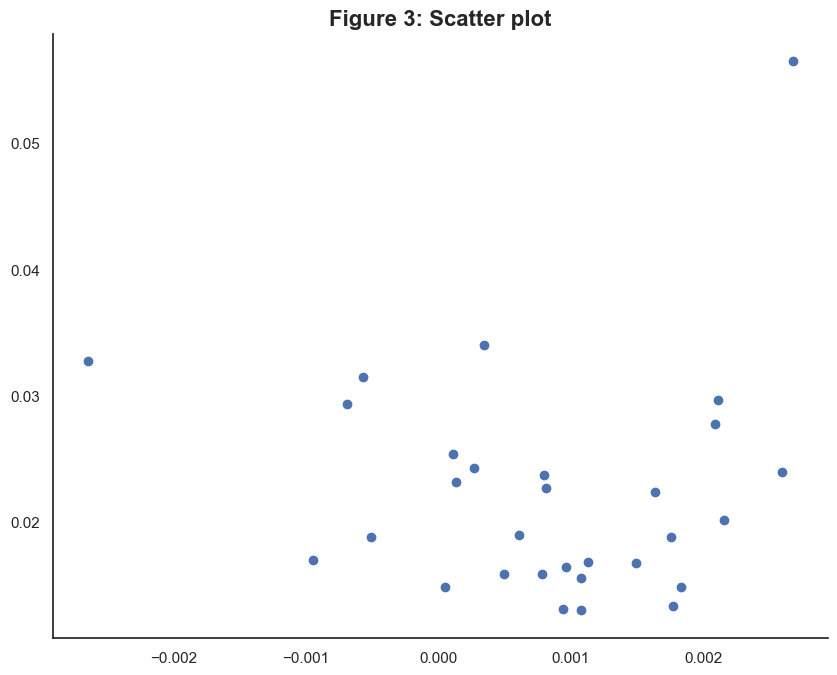

In [16]:
fig, ax = plt.subplots()

plt.scatter('Annual Returns',
            'Standard Deviation', 
            data = df_returns_std)

plt.title('Figure 3: Scatter plot',
            fontsize = 16, 
            fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

From viewing the scatter plot in figure , there is no clear indication of the number of clusters there are, hence which is why the elbow method is crucial

### Calculation Weighted Clusters Sum of Squares (WCSS)

C:\Users\Nigel Gondo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


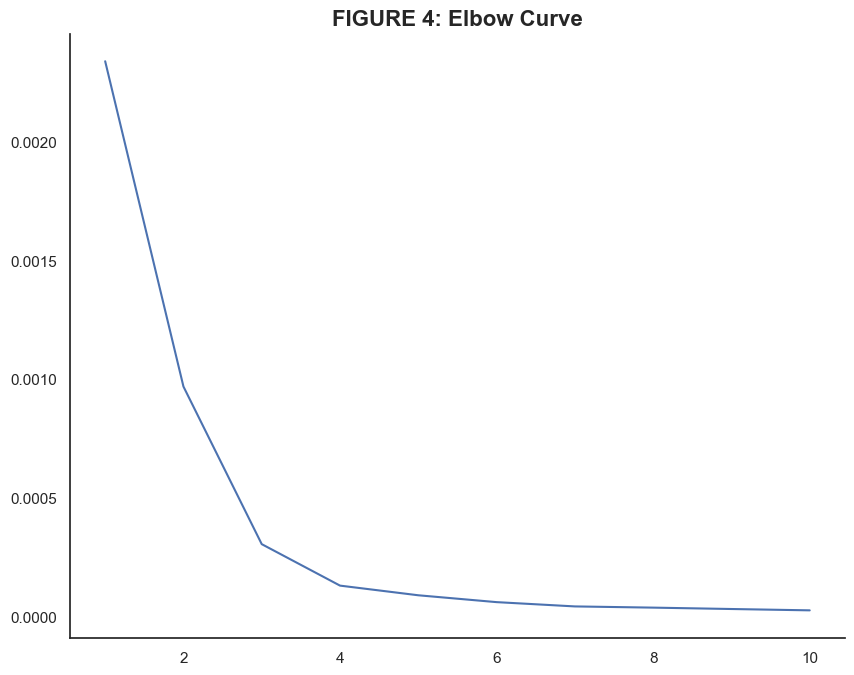

In [17]:
#Elbow curve by calcalting the SSE for different values of k
X =  df_returns_std.values #Converting df_returns into nummpy array
sse = []
for k in range(1,11):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
    
fig, ax = plt.subplots() 

plt.plot(range(1,11), sse)

plt.title('FIGURE 4: Elbow Curve',
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

The best way to determine the optimal number of clusters is by using the Elbow Curve shown above.

Over a predetermined range of clusters (k), this method will be varying the number of clusters. For each value of 'k', the sum of squared Euclidean distance (SSE) between each point of the cluster and the centroid of the cluster is calculated.

When the SSE is plotted it will be like an Elbow as illustrated above in figure 4.

As the number of clusters increases the value of SSE will decrease. When 'k' is equal to 1 that is when SSE is at its largest.

Therefore, the point of the elbow will highlight the optimal value for 'k', and in this case, the optimal value for k is five.


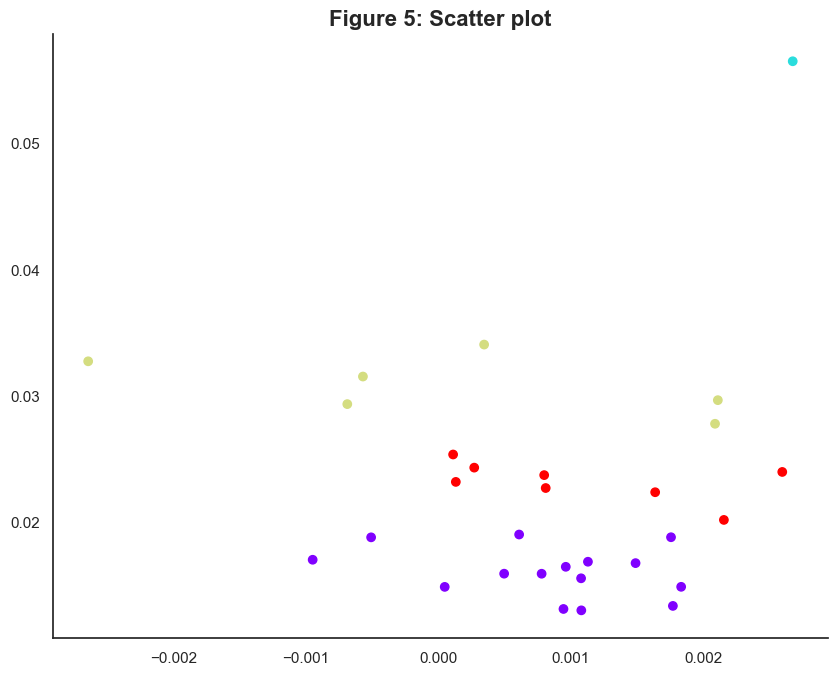

In [18]:
#training the kmeans model using 5 clusters and calsulating the centroids
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_

fig, ax = plt.subplots()

plt.scatter(X[:,0],X[:,1], 
            c = kmeans.labels_, 
            cmap ="rainbow")

plt.title('Figure 5: Scatter plot', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

In [19]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 3, 3, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 0,
       1, 1, 2, 3, 0, 3, 3, 0])

There is an outlier present in the data so that will be removed from the dataset

In [20]:
print(df_returns_std.idxmax())

Annual Returns        Steinhoff
Standard Deviation    Steinhoff
dtype: object


In [21]:
#Removing Steinhoff from the data set
df_returns_std.drop('Steinhoff', inplace=True)

In [22]:
df_returns_std

,Annual Returns,Standard Deviation
British American Tobacco,0.001078,0.013018
Richemont,0.000810,0.022701
Anglo America,0.000270,0.024315
MTN,0.002594,0.023974
Naspers,-0.002642,0.032734
Sasol,0.002108,0.029657
Standard Bank,0.001487,0.016756
Vodacom,0.000944,0.013127
Kumba,-0.000569,0.031527
First Rand,0.001128,0.016866


In [23]:
#creating lists of the variable to be looped over to name the scatter plot points
returns_coord = list(df_returns_std['Annual Returns'])
std_coord = list(df_returns_std['Standard Deviation'])
companies_list = list(df_returns_std.index)

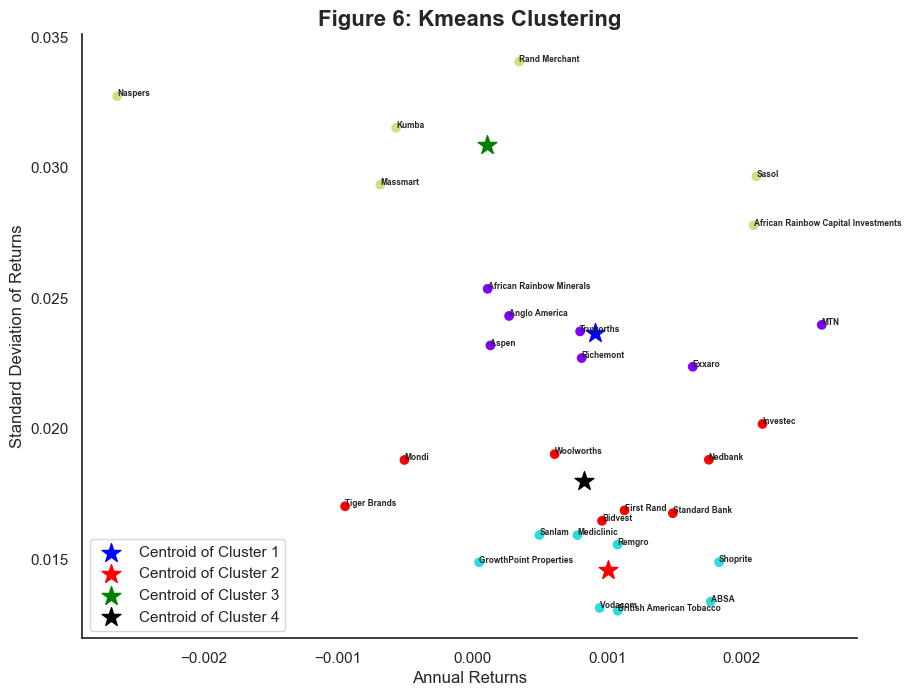

In [24]:
X = df_returns_std.values
#fitting the model
kmeans = KMeans(n_clusters = 4).fit(X)
#the cluster centroids
centroids = kmeans.cluster_centers_

#plotting the clustered scatter plot
fig, ax = plt.subplots()

ax.scatter(X[:,0],X[:,1], 
           c = kmeans.labels_, 
           cmap = 'rainbow')

for a, b, c in zip(returns_coord,std_coord,companies_list):
    ax.text(a, b, c, fontsize = 6, fontweight = 'bold')
    
plt.scatter(centroids[0,0], 
            centroids[0,1], 
            s = 200, 
            marker = '*', 
            color = 'blue', label = 
            'Centroid of Cluster 1')

plt.scatter(centroids[1,0], 
            centroids[1,1], 
            s = 200, 
            marker = '*', 
            color = 'red', 
            label = 'Centroid of Cluster 2')

plt.scatter(centroids[2,0], 
            centroids[2,1], 
            s = 200, 
            marker = '*', 
            color = 'green', 
            label = 'Centroid of Cluster 3')

plt.scatter(centroids[3,0], 
            centroids[3,1], 
            s = 200, 
            marker = '*', 
            color = 'Black', 
            label = 'Centroid of Cluster 4')

plt.xlabel('Annual Returns')

plt.ylabel('Standard Deviation of Returns')

plt.title('Figure 6: Kmeans Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.legend(loc = 'lower left')

plt.show()

**Brief Analysis**

Cluster three contains six companies of Naspers, Kumba, Rand Merchant, Mass Mart, Sasol and African Rainbow Capital Investments these have been highly volatile stocks over the calculated period, and they seem to have had offered low returns compared to the rest of the other companies.

Cluster zero is the best cluster out of the four and contains a diverse set of companies in different industries such as finance, telecoms,’ retail, and banking and insurance companies. This cluster has had low volatility and offered high returns on its stocks. So, it can be a good portfolio of stocks to have for an investor.

Cluster four is also a good cluster as it has a good array of diverse companies and has a slightly higher variation in its returns than cluster four. However, it has offered overall high returns over the course of the year.


In [25]:
#Creating cluster labels and merging dataframe of clusters and the company names
cluster_labels = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
Company = pd.DataFrame(df_returns_std.index, columns=['Companies'])

df_companies_clustered = pd.concat([Company, cluster_labels], 
                                   axis = 1).sort_values('Cluster')
df_companies_clustered

,Companies,Cluster
1,Richemont,0
2,Anglo America,0
3,MTN,0
26,Truworths,0
20,Exxaro,0
16,Aspen,0
27,African Rainbow Minerals,0
0,British American Tobacco,1
22,GrowthPoint Properties,1
13,Shoprite,1


In [26]:
#Color coded rows of the different clustered companies for easier visualisation
def format_color_groups(df):
    colors = ['red', 'yellow']
    x = df_companies_clustered.copy()
    factors = list(x['Cluster'].unique())
    i = 0
    for factor in factors:
        style = f'background-color: {colors[i]}'
        x.loc[x['Cluster'] == factor, :] = style
        i = not i
    return x

df_companies_clustered.style.apply(format_color_groups, axis=None)

,Companies,Cluster
1,Richemont,0
2,Anglo America,0
3,MTN,0
26,Truworths,0
20,Exxaro,0
16,Aspen,0
27,African Rainbow Minerals,0
0,British American Tobacco,1
22,GrowthPoint Properties,1
13,Shoprite,1


# Hierarchical Clustering (Dendrogram) - Agglomerative Clustering

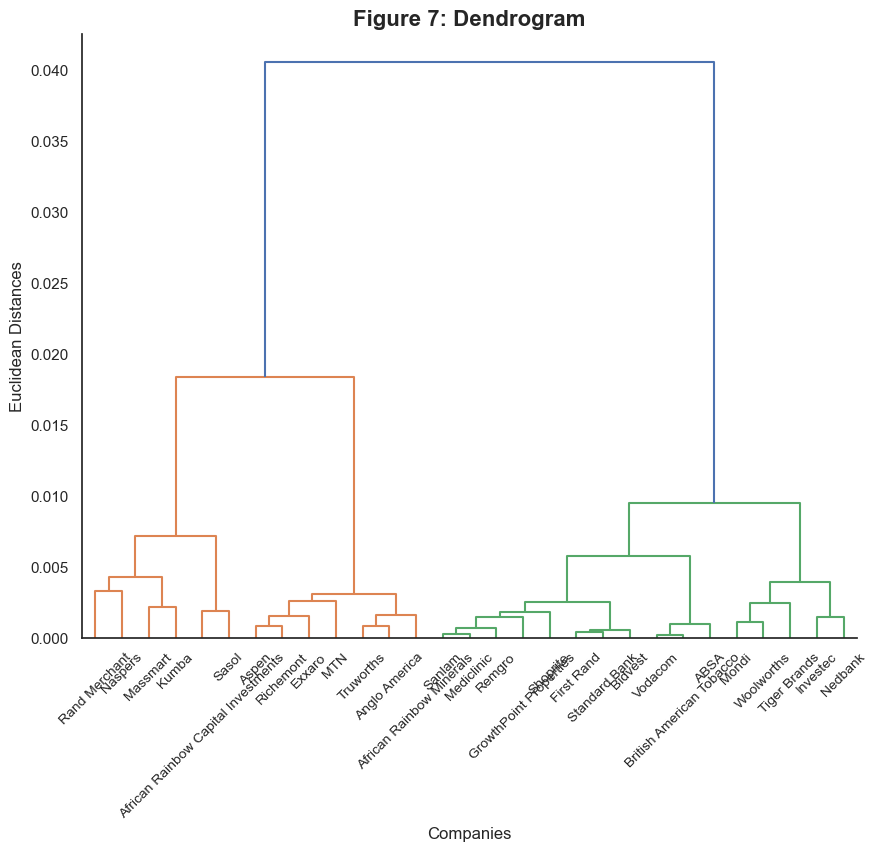

In [39]:
linked = linkage(X, 
                 method='ward')

fig, ax = plt.subplots()

dendrogram(linked, 
           orientation='top',
           distance_sort='descending', 
           labels=companies_list)

plt.title('Figure 7: Dendrogram', 
          fontsize = 16, 
          fontweight = 'bold')

plt.xlabel('Companies')

plt.ylabel('Euclidean Distances')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

In [37]:
hc = AgglomerativeClustering(n_clusters = 4, 
                             affinity = 'euclidean', 
                             linkage = 'ward')

y_hc = hc.fit_predict(X)

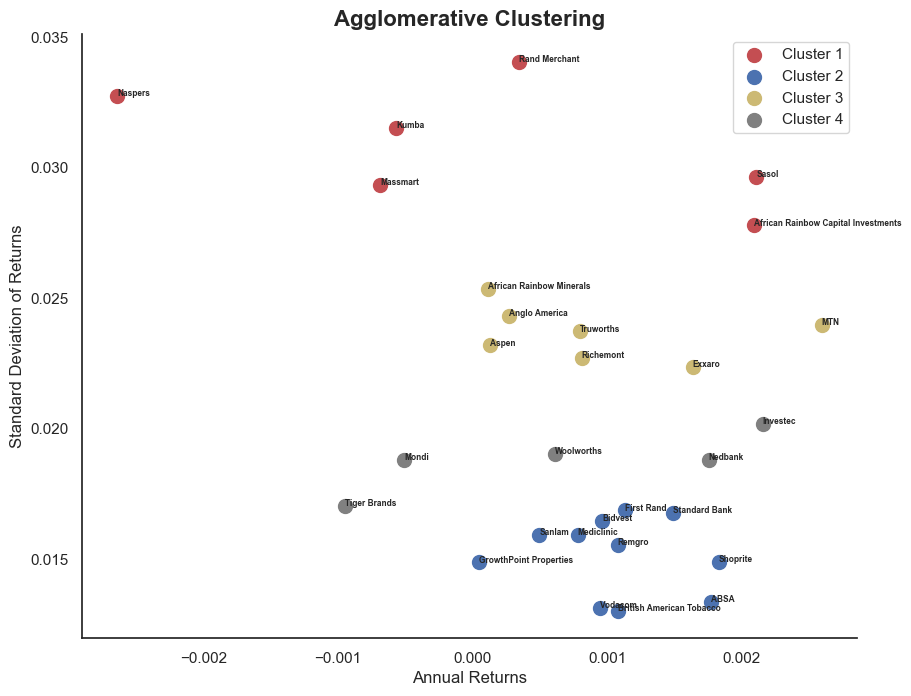

In [44]:
#Visualising the Agglomerative Clustering
fig, ax = plt.subplots()

for a, b, c in zip(returns_coord,std_coord,companies_list):
    ax.text(a, b, c, fontsize = 6, fontweight = 'bold')

plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s =100, c ='r', label = 'Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s =100, c ='b', label = 'Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s =100, c ='y', label = 'Cluster 3')
plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s =100, c ='grey', label = 'Cluster 4')

plt.title('Agglomerative Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

plt.xlabel('Annual Returns')

plt.ylabel('Standard Deviation of Returns')

plt.legend()

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)
